In [1]:
#======Libraries======
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import torch
# import torch.nn as nn
# import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, log_loss
from sklearn.model_selection import train_test_split
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
#======Function Definitions======
def decision_boundary(x, theta_zero, theta_one, theta_two):
    return -(theta_zero + theta_one * x) / theta_two

In [3]:
#======Initialization======
np.random.seed(42)
np.set_printoptions(precision = 20)
gender_palette = {"Male": "#88CCFF", "Female": "#FF88DD"} # Color palette for graphing gender

In [4]:
#======Data Loading======
df = pd.read_csv("weight-height.csv")
df = df.sample(frac=1).reset_index(drop=True) # Shuffles dataframe
print(df.isna().sum()) # No NAs/NaNs
display(df.head(10))

Gender    0
Height    0
Weight    0
dtype: int64


,Gender,Height,Weight
0,Female,68.687232,173.115813
1,Male,68.829334,195.162042
2,Male,66.398128,170.217451
3,Male,71.929340,215.049660
4,Male,67.042903,182.721452
5,Female,65.310436,136.434393
6,Male,66.045444,169.326284
7,Female,66.759071,150.881330
8,Female,62.598648,114.766882
9,Male,63.596455,144.591922


In [5]:
#======Data Cleaning======
# Defines the features and labels
features = df[["Height", "Weight"]]
labels = df["Gender"]

# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [6]:
#======Training======
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [7]:
#======Analysis======
y_predicted = model.predict(X_test)
y_predicted_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_predicted_proba[:, 1])

print(classification_report(y_test, y_predicted))
print(f"F1-Score:\t{f1_score(y_test, y_predicted, pos_label='Male')}")
print(f"Log Loss:\t{log_loss(y_test, y_predicted_proba)}")
print(f"ROC-AUC:\t{roc_auc}")

              precision    recall  f1-score   support

      Female       0.92      0.92      0.92      1003
        Male       0.92      0.92      0.92       997

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

F1-Score:	0.9212242849974912
Log Loss:	0.20243027084605875
ROC-AUC:	0.9751247761229851


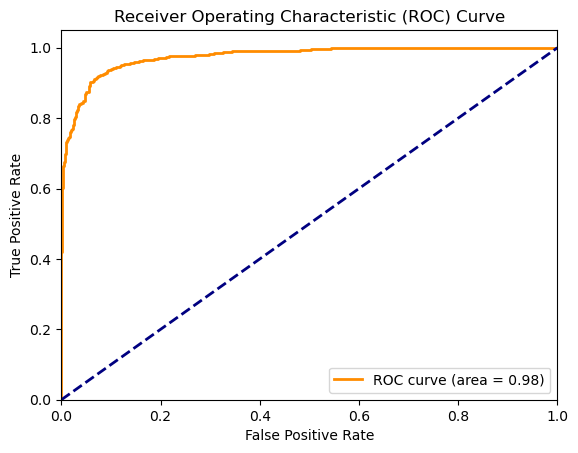

In [8]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:, 1], pos_label='Male')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

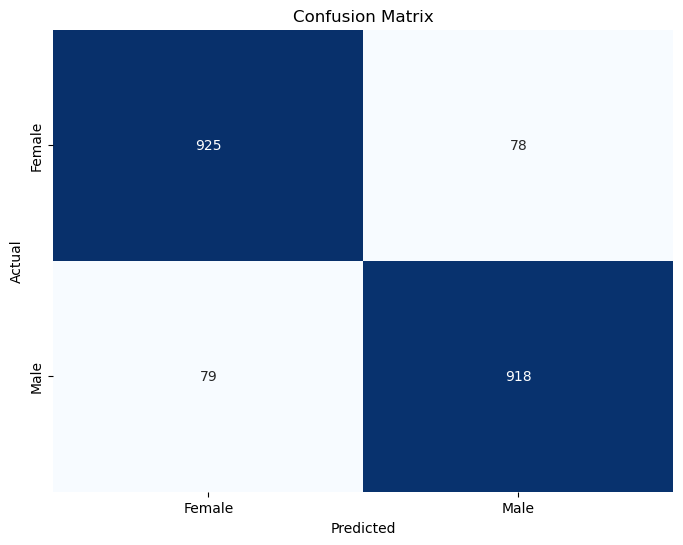

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

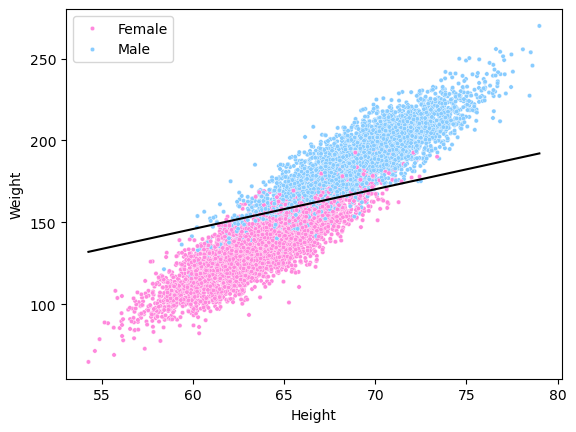

In [10]:
height = np.linspace(features["Height"].min(), features["Height"].max(), 100)
weight = decision_boundary(height, model.intercept_[0], model.coef_[0][0], model.coef_[0][1])

sns.scatterplot(data=df, x="Height", y="Weight", hue="Gender", s=10, palette=gender_palette)
sns.lineplot(x=height, y=weight, color="black")
plt.show()